# Uber Trip Case study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* import library's for understand the data 

In [22]:
data = pd.read_csv(r"D:\project uber naalysisy\uber-raw-data-sep14.csv (1)\uber-raw-data-sep14.csv")

In [23]:
data

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [24]:
from sklearn.model_selection import train_test_split
data,_=train_test_split(data,test_size=.96,random_state=0)

* There are 1million rows and 4 columns so 
* Here we will work on sample data instead of working on complete data.

In [25]:
data.shape

(41125, 4)

* Our sample data has 41125 rows

In [26]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
381233,2014-09-09 09:44:00,40.7722,-73.9827,B02617
141225,2014-09-13 19:34:00,40.7297,-73.9864,B02598
774222,2014-09-18 22:43:00,40.7482,-73.9848,B02682
963084,2014-09-22 02:45:00,40.6551,-73.7246,B02764
159797,2014-09-16 09:53:00,40.7579,-73.9835,B02598


* We updated the date and time column here
* And all the date and time were brought in the correct format with the help of the map

In [51]:
data['month']=data['Date/Time'].dt.month
data["day"]= data["Date/Time"].dt.day
data['year']=data['Date/Time'].dt.year
data['week_of_day']=data['Date/Time'].dt.dayofweek

* With the help of date and time, we got this month, day, year, week of days

In [ ]:
data['isweekend']=np.where(data['week_of_day'].isin([5,6]),1,0)

* With the help of date and time, we also got the weekends, with the help of and isin, in week days, if it is a weekend, then it is marked as 1 and if not, then it is marked as 0.

In [53]:
def day_cut(x):
    if x<=10:
        return "stating_of_month"
    elif x>10 and x<=20:
        return  "mid_of_month"
    else:
        return "end_of_month"


In [54]:
data["day_cat"]=data["day"].apply( lambda a : day_cut(a))

* Here we have created a function where the first 10 days of the month are written as start of month and
middle 10 days mid of month and last 10 days end of month.
* And after creating a new column, we applied it there.

In [55]:
data

,Date/Time,Lat,Lon,Base,month,day,year,week_of_day,isweekend,day_cat
381233,2014-09-09 09:44:00,40.7722,-73.9827,B02617,9,9,2014,1,0,stating_of_month
141225,2014-09-13 19:34:00,40.7297,-73.9864,B02598,9,13,2014,5,1,mid_of_month
774222,2014-09-18 22:43:00,40.7482,-73.9848,B02682,9,18,2014,3,0,mid_of_month
963084,2014-09-22 02:45:00,40.6551,-73.7246,B02764,9,22,2014,0,0,end_of_month
159797,2014-09-16 09:53:00,40.7579,-73.9835,B02598,9,16,2014,1,0,mid_of_month
...,...,...,...,...,...,...,...,...,...,...
963395,2014-09-22 06:06:00,40.6485,-73.7829,B02764,9,22,2014,0,0,end_of_month
117952,2014-09-11 13:12:00,40.7638,-73.9713,B02598,9,11,2014,3,0,mid_of_month
435829,2014-09-13 08:58:00,40.7292,-74.0026,B02617,9,13,2014,5,1,mid_of_month
305711,2014-09-03 21:04:00,40.7196,-73.9980,B02617,9,3,2014,2,0,stating_of_month


In [57]:
data["day_cat"].value_counts()

mid_of_month        14755
stating_of_month    13467
end_of_month        12903
Name: day_cat, dtype: int64

In [59]:
data['hour']=data['Date/Time'].dt.hour


* here we create Hour column with the help of date/time`

In [61]:
data

,Date/Time,Lat,Lon,Base,month,day,year,week_of_day,isweekend,day_cat,hour
381233,2014-09-09 09:44:00,40.7722,-73.9827,B02617,9,9,2014,1,0,stating_of_month,9
141225,2014-09-13 19:34:00,40.7297,-73.9864,B02598,9,13,2014,5,1,mid_of_month,19
774222,2014-09-18 22:43:00,40.7482,-73.9848,B02682,9,18,2014,3,0,mid_of_month,22
963084,2014-09-22 02:45:00,40.6551,-73.7246,B02764,9,22,2014,0,0,end_of_month,2
159797,2014-09-16 09:53:00,40.7579,-73.9835,B02598,9,16,2014,1,0,mid_of_month,9
...,...,...,...,...,...,...,...,...,...,...,...
963395,2014-09-22 06:06:00,40.6485,-73.7829,B02764,9,22,2014,0,0,end_of_month,6
117952,2014-09-11 13:12:00,40.7638,-73.9713,B02598,9,11,2014,3,0,mid_of_month,13
435829,2014-09-13 08:58:00,40.7292,-74.0026,B02617,9,13,2014,5,1,mid_of_month,8
305711,2014-09-03 21:04:00,40.7196,-73.9980,B02617,9,3,2014,2,0,stating_of_month,21


In [62]:
def hour_category(x): 
    if x >=4 and x<8 :
        return "early morning"
    elif x>=8 and x<=12:
        return "morning"
    elif x>=12 and x<=16:
        return "afternoon"
    elif x>=16 and x<=20:
        return "evening"
    elif x>=20 and x<=24:
        return "night"
    elif x>=0 and x<=4:
        return "mid_night"
    else:
        return "unknown"


In [63]:
data["hours_cat"]=data["hour"].apply(lambda a : hour_category(a))

* We made a function where we made hour(a full day 24 hr time) wise like early morning, evening, night and unknown
* we created new columns and applied it there

In [64]:
data

,Date/Time,Lat,Lon,Base,month,day,year,week_of_day,isweekend,day_cat,hour,hours_cat
381233,2014-09-09 09:44:00,40.7722,-73.9827,B02617,9,9,2014,1,0,stating_of_month,9,morning
141225,2014-09-13 19:34:00,40.7297,-73.9864,B02598,9,13,2014,5,1,mid_of_month,19,evening
774222,2014-09-18 22:43:00,40.7482,-73.9848,B02682,9,18,2014,3,0,mid_of_month,22,night
963084,2014-09-22 02:45:00,40.6551,-73.7246,B02764,9,22,2014,0,0,end_of_month,2,mid_night
159797,2014-09-16 09:53:00,40.7579,-73.9835,B02598,9,16,2014,1,0,mid_of_month,9,morning
...,...,...,...,...,...,...,...,...,...,...,...,...
963395,2014-09-22 06:06:00,40.6485,-73.7829,B02764,9,22,2014,0,0,end_of_month,6,early morning
117952,2014-09-11 13:12:00,40.7638,-73.9713,B02598,9,11,2014,3,0,mid_of_month,13,afternoon
435829,2014-09-13 08:58:00,40.7292,-74.0026,B02617,9,13,2014,5,1,mid_of_month,8,morning
305711,2014-09-03 21:04:00,40.7196,-73.9980,B02617,9,3,2014,2,0,stating_of_month,21,night


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

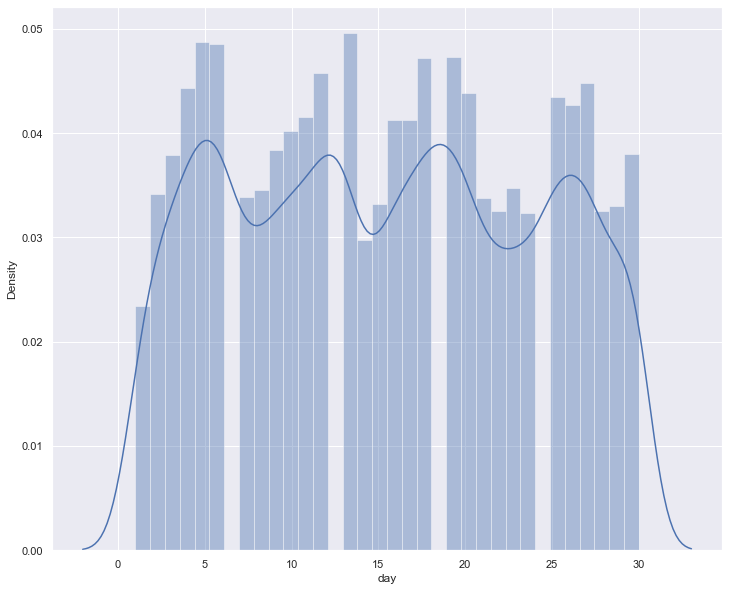

In [66]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["day"])

* With the help of month data, we made a graph and saw when Uber trips are increasing throughout the month and when it is less.
* By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. 
* Now let’s analyze the Uber trips according to the hours:

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

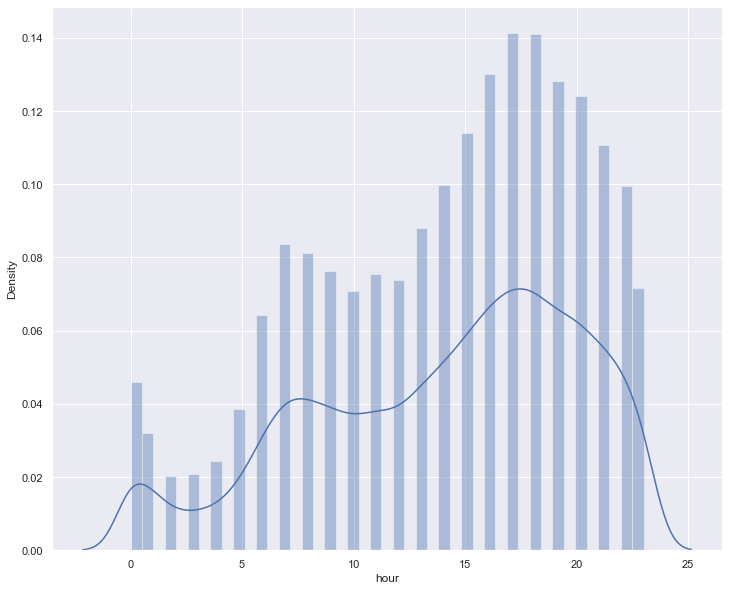

In [75]:
sns.distplot(data["hour"])

* According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing.
* Now let’s analyze the Uber trips according to the weekdays:

<AxesSubplot:xlabel='week_of_day', ylabel='Density'>

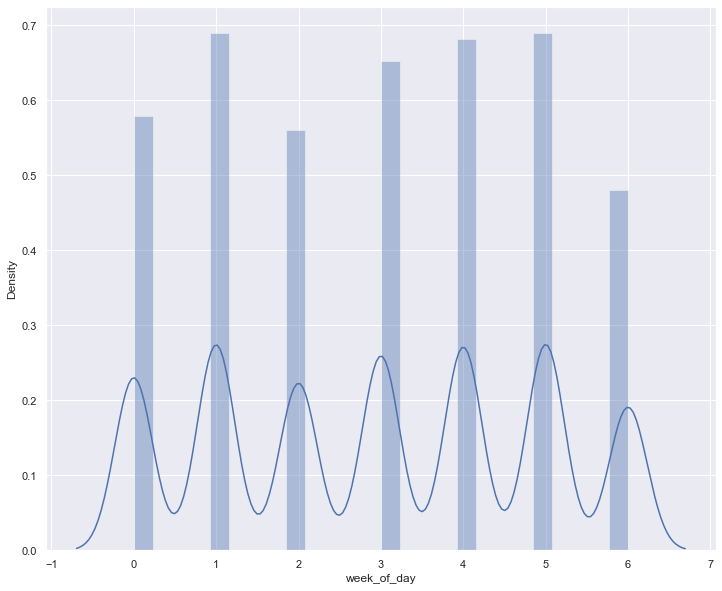

In [74]:
sns.distplot(data["week_of_day"])

* In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people 
also use Uber for outings rather than
*for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest.
* Now let’s have a look at the correlation of hours and weekdays on the Uber trips:

<AxesSubplot:xlabel='hour', ylabel='week_of_day'>

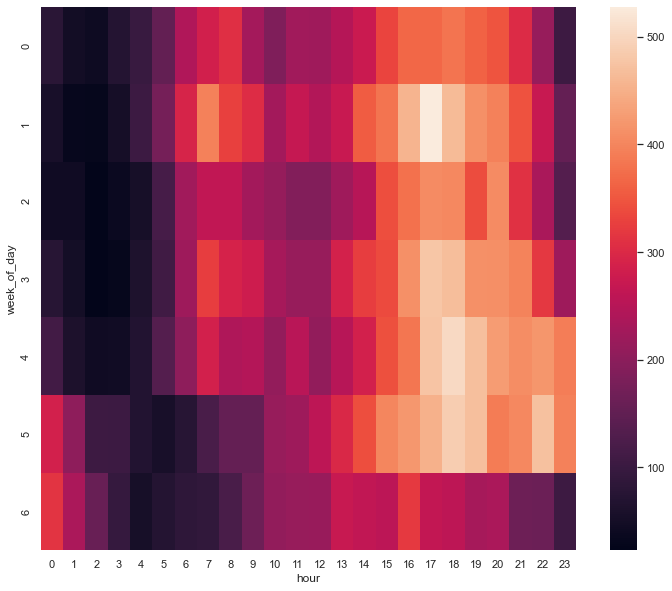

In [70]:
df = data.groupby(["week_of_day", "hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

* As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


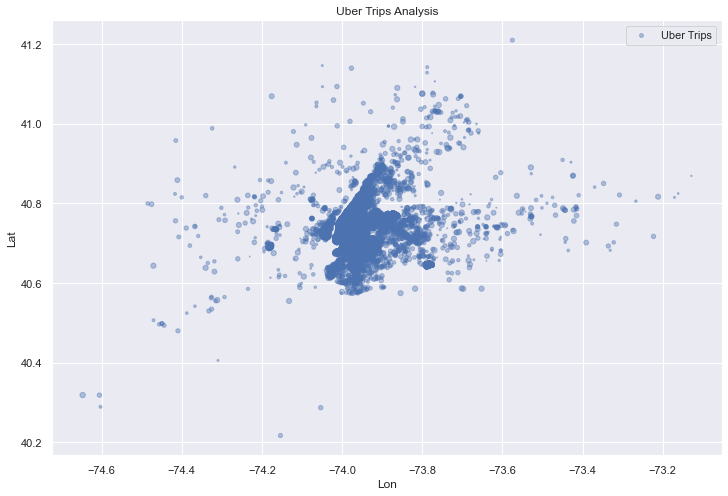

In [72]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

## Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

* Monday is the most profitable day for Uber
* On Saturdays less number of people use Uber
* 6 pm is the busiest day for Uber
* On average a rise in Uber trips start around 5 am.
* Most of the Uber trips originate near the Manhattan region in New York.